In [23]:
using JLD2
using DynamicPolynomials
using TSSOS

function coef_range(obj)
    maximum(abs.(coefficients(obj)))/minimum(abs.(coefficients(obj)))
end

using Plots


function heatmap_obj(objective)

    function f(γ_val, ω_val)
        return objective(variables(objective) => (γ_val, ω_val))
    end
    
    w = range(-30, 10, length=1000)
    g = range(-2*γᶠ, 2*γᶠ, length=1000)

    z = @. f(g', w)

    heatmap(g, w, log.(z))

end


function contour_obj(objective)

    function f(γ_val, ω_val)
        return objective(variables(objective) => (γ_val, ω_val))
    end
    
    w = range(-30, 10, length=1000)
    g = range(-5, 5, length=1000)

    z = @. f(g', w)

    contour(g, w, log.(z))
end

function scaling_poly(p::Polynomial)

    X = transpose(hcat([exponents(t) for t in terms(p)]...))

    # Get the scaling via linear regression
    scaling = X \ log.(abs.(coefficients(p)))

    exp.(abs.(scaling)) # 
end

scaling_poly (generic function with 1 method)

Consider polynomial objective

In [2]:
p = load_object("objective_2.jld2")

4.2839549627051654e61γ⁸ + 6.85432794032826e62γ⁶ω² + 4.112596764196958e63γ⁴ω⁴ + 1.096692470452524e64γ²ω⁶ + 1.0966924704525269e64ω⁸ + 8.881253075882506e63γ⁷ + 1.744628333942836e64γ⁶ω + 1.0657503691059004e65γ⁵ω² + 2.0935540007314008e65γ⁴ω³ + 4.263001476423606e65γ³ω⁴ + 8.374216002925601e65γ²ω⁵ + 5.684001968564818e65γω⁶ + 1.1165621337234144e66ω⁷ + 7.011931662569511e65γ⁶ + 2.7207158826808667e66γ⁵ω + 8.29273443626271e66γ⁴ω² + 2.176572706144691e67γ³ω³ + 3.2684603509768004e67γ²ω⁴ + 4.3531454122893826e67γω⁵ + 4.293102569931348e67ω⁶ + 2.4938350813017055e67γ⁵ + 1.4397702878307073e68γ⁴ω + 3.8115012450098734e68γ³ω² + 7.627675571644201e68γ²ω³ + 1.125586884995674e69γω⁴ + 7.474377681285481e68ω⁵ + 6.648136088100041e68γ⁴ + 2.6933543073474405e69γ³ω + 7.672622600622349e69γ²ω² + 1.0212249307598307e70γω³ + 5.272231657299899e69ω⁴ + 1.9852534726479397e69γ³ + 6.150094238818916e69γ²ω + 1.0756778081743373e70γω² + 7.172062038268842e69ω³ + 1.0026157043721992e70γ² + 2.0142107421266268e70γω + 1.963747969704051e70ω² +

Suspected minumum

In [3]:
variables(p)

2-element Vector{PolyVar{true}}:
 γ
 ω

In [7]:
#γᶠ = 2.5133^2
γᶠ = 0.079477^2
ωᶠ = -25.133

p(variables(p) => (γᶠ, ωᶠ))

3.6908014760860728e65

In [8]:
p(variables(p) => (0, 0))

9.511137858676358e69

Check the range of coefficients 

Ploting the function we can see it has three local minima 

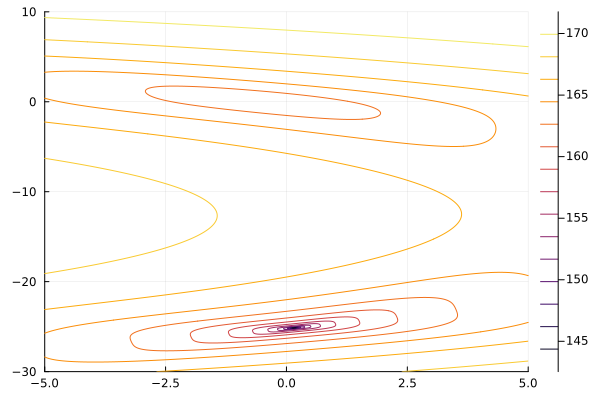

In [19]:
contour_obj(p)

In [24]:
pd = p / maximum(abs.(coefficients(p)))


2.1268653140942526e-9γ⁸ + 3.4029845025508015e-8γ⁶ω² + 2.041790701530482e-7γ⁴ω⁴ + 5.444775204081294e-7γ²ω⁶ + 5.444775204081309e-7ω⁸ + 4.4092968477099754e-7γ⁷ + 8.661597803320409e-7γ⁶ω + 5.29115621725197e-6γ⁵ω² + 1.0393917363984478e-5γ⁴ω³ + 2.11646248690079e-5γ³ω⁴ + 4.1575669455937904e-5γ²ω⁵ + 2.8219499825343913e-5γω⁶ + 5.543422594125058e-5ω⁷ + 3.4812303975532535e-5γ⁶ + 0.00013507602882746538γ⁵ω + 0.000411711359830558γ⁴ω² + 0.0010806082306197217γ³ω³ + 0.0016227002878189014γ²ω⁴ + 0.002161216461239444γω⁵ + 0.002131406848420757ω⁶ + 0.0012381202369463513γ⁵ + 0.007148061807626849γ⁴ω + 0.018923050926566137γ³ω² + 0.037869302412670156γ²ω³ + 0.055882279915122804γω⁴ + 0.037108220728651ω⁵ + 0.03300615943037253γ⁴ + 0.13371760218614295γ³ω + 0.38092451996961874γ²ω² + 0.5070099714003161γω³ + 0.2617517396284669ω⁴ + 0.09856235155174907γ³ + 0.30533519210237037γ²ω + 0.5340443210220517γω² + 0.35607307062102633ω³ + 0.49777100449460715γ² + γω + 0.9749466272981463ω² + 0.3359126474402854γ + 0.31956433606376ω + 

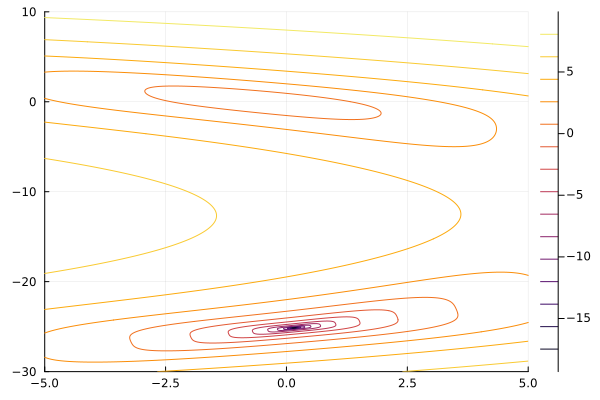

In [26]:
contour_obj(pd)

In [29]:
scale = scaling_poly(pd)
p_scaled = DynamicPolynomials.subs(pd, variables(pd) => scale .* variables(pd))

0.0031843539755626446γ⁸ + 0.013494119864379674γ⁶ω² + 0.021443667103867498γ⁴ω⁴ + 0.01514506115693981γ²ω⁶ + 0.004011199606212849ω⁸ + 0.11161961464781639γ⁷ + 0.11284201063780017γ⁶ω + 0.3547521265300064γ⁵ω² + 0.3586371746756814γ⁴ω³ + 0.37582722855847633γ³ω⁴ + 0.37994307950963785γ²ω⁵ + 0.13271811983909101γω⁶ + 0.13417157493299475ω⁷ + 1.490025768994008γ⁶ + 2.9753695741391386γ⁵ω + 4.667207449191877γ⁴ω² + 6.3042604532003566γ³ω³ + 4.871983520510914γ²ω⁴ + 3.339391869771759γω⁵ + 1.6948727488201631ω⁶ + 8.96011669130262γ⁵ + 26.62200520008156γ⁴ω + 36.269806974155934γ³ω² + 37.3545073010694γ²ω³ + 28.368178117661113γω⁴ + 9.694581840183572ω⁵ + 40.38644887715741γ⁴ + 84.20364204831803γ³ω + 123.44765552034922γ²ω² + 84.55942856499794γω³ + 22.46656811471154ω⁴ + 20.391142643089726γ³ + 32.509402699230264γ²ω + 29.26247461086769γω² + 10.04094295510073ω³ + 17.412051077536137γ² + 18.002049797284155γω + 9.032426187856768ω² + 1.9867193627336275γ + 0.9726802446088516ω + 0.47220172446475933

In [33]:
coef_range(p_scaled)

38766.93874729715

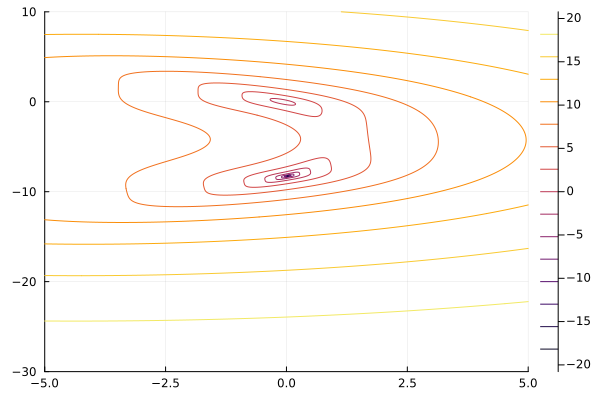

In [30]:
contour_obj(p_scaled)

TSSOS fails

In [31]:
using TSSOS

opt,sol,data = tssos_first(p_scaled, variables(p_scaled), solution=true, newton=true)

*********************************** TSSOS ***********************************
Version 1.0.0, developed by Jie Wang, 2020--2023
TSSOS is launching...


Starting to compute the block structure...


-----------------------------------------------------------------------------
The sizes of PSD blocks:
[15]
[1]
-----------------------------------------------------------------------------
Obtained the block structure. The maximal size of blocks is 15.


Assembling the SDP...
There are 45 affine constraints.


Solving the SDP...


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 45              
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 1               
  Matrix variables       : 2 (scalarized: 126)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0        


Global optimality certified with relative optimality gap 0.000002%!


(2.1531058110841017e-6, [0.039455479565596245, -8.229290709484006], TSSOS.upop_data(2, 0, PolyVar{true}[γ, ω], 0.0031843539755626446γ⁸ + 0.013494119864379674γ⁶ω² + 0.021443667103867498γ⁴ω⁴ + 0.01514506115693981γ²ω⁶ + 0.004011199606212849ω⁸ + 0.11161961464781639γ⁷ + 0.11284201063780017γ⁶ω + 0.3547521265300064γ⁵ω² + 0.3586371746756814γ⁴ω³ + 0.37582722855847633γ³ω⁴ + 0.37994307950963785γ²ω⁵ + 0.13271811983909101γω⁶ + 0.13417157493299475ω⁷ + 1.490025768994008γ⁶ + 2.9753695741391386γ⁵ω + 4.667207449191877γ⁴ω² + 6.3042604532003566γ³ω³ + 4.871983520510914γ²ω⁴ + 3.339391869771759γω⁵ + 1.6948727488201631ω⁶ + 8.96011669130262γ⁵ + 26.62200520008156γ⁴ω + 36.269806974155934γ³ω² + 37.3545073010694γ²ω³ + 28.368178117661113γω⁴ + 9.694581840183572ω⁵ + 40.38644887715741γ⁴ + 84.20364204831803γ³ω + 123.44765552034922γ²ω² + 84.55942856499794γω³ + 22.46656811471154ω⁴ + 20.391142643089726γ³ + 32.509402699230264γ²ω + 29.26247461086769γω² + 10.04094295510073ω³ + 17.412051077536137γ² + 18.002049797284155γω + 9.

In [34]:
scale.*sol

2-element Vector{Float64}:
   0.2333552065283453
 -25.048065747428048

In [38]:
γᶠ 

0.006316593529000001

In [35]:
opt,sol2,data = tssos_first(pd, variables(pd), solution=true, newton=true)

*********************************** TSSOS ***********************************
Version 1.0.0, developed by Jie Wang, 2020--2023
TSSOS is launching...
Starting to compute the block structure...
-----------------------------------------------------------------------------
The sizes of PSD blocks:
[15]
[1]
-----------------------------------------------------------------------------
Obtained the block structure. The maximal size of blocks is 15.
Assembling the SDP...
There are 45 affine constraints.
Solving the SDP...
Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 45              
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 1               
  Matrix variables       : 2 (scalarized: 126)
  Integer variables      : 0               

Optimizer 

(0.4115069081238428, [-0.39185663836098533, 0.020096831495431688], TSSOS.upop_data(2, 0, PolyVar{true}[γ, ω], 2.1268653140942526e-9γ⁸ + 3.4029845025508015e-8γ⁶ω² + 2.041790701530482e-7γ⁴ω⁴ + 5.444775204081294e-7γ²ω⁶ + 5.444775204081309e-7ω⁸ + 4.4092968477099754e-7γ⁷ + 8.661597803320409e-7γ⁶ω + 5.29115621725197e-6γ⁵ω² + 1.0393917363984478e-5γ⁴ω³ + 2.11646248690079e-5γ³ω⁴ + 4.1575669455937904e-5γ²ω⁵ + 2.8219499825343913e-5γω⁶ + 5.543422594125058e-5ω⁷ + 3.4812303975532535e-5γ⁶ + 0.00013507602882746538γ⁵ω + 0.000411711359830558γ⁴ω² + 0.0010806082306197217γ³ω³ + 0.0016227002878189014γ²ω⁴ + 0.002161216461239444γω⁵ + 0.002131406848420757ω⁶ + 0.0012381202369463513γ⁵ + 0.007148061807626849γ⁴ω + 0.018923050926566137γ³ω² + 0.037869302412670156γ²ω³ + 0.055882279915122804γω⁴ + 0.037108220728651ω⁵ + 0.03300615943037253γ⁴ + 0.13371760218614295γ³ω + 0.38092451996961874γ²ω² + 0.5070099714003161γω³ + 0.2617517396284669ω⁴ + 0.09856235155174907γ³ + 0.30533519210237037γ²ω + 0.5340443210220517γω² + 0.356073

In [37]:
sol2

2-element Vector{Float64}:
 -0.39185663836098533
  0.020096831495431688